## Order effect

In [1]:
addpath('/data/drive/DPhil/THESIS/Cross_study_analyses/learning-repo/scripts')

% load all data sets!
comp='onx';ca=1; pX_analysis_init;


% filter the data
% specify what data to EXCLUDE (this should be a json structure, but
% matlab...
sp = { 
        {{'study'}, {[1,2]}},
        };
[SData] = pX_filter_data(sp, 'pX', 1);
disp('Only study III included')
subIDs = cellstr(SData.specID);

% It's possible to do the entire analyses using model-generated data 
% data_type = 'real_data', 'RW_3_mle_n20', 'betaStSw_v2g_c_mle_n20',
% 'RW_6_volatility_mle_n20'

data = pX_build_dataset(subIDs, SData, 'real_data',0);


ans =

    '9.6.0.1099231 (R2019a) Update 1'

Raw participants: 116
Excluded for missing anxiety scores:
    'ss11'
    'ss31'

Participans after anx exlc.: 114
Excluded for failure to distinguish harm from safe:
Participans after dist exlc.: 114
   pl9 ... excluding for misunderstanding the task
   ss8_bl7525 ... excluding for missing more than 50% of data
   ss4_bl6040 ... excluding for missing more than 50% of data
   m01_v1 ... excluding for missing more than 50% of data
   m13_v1 ... excluding for missing more than 50% of data
   f39_v1 ... excluding for missing more than 50% of data
   f38_v1 ... excluding for missing more than 50% of data
Participans after all exlc.: 37
Only study III included


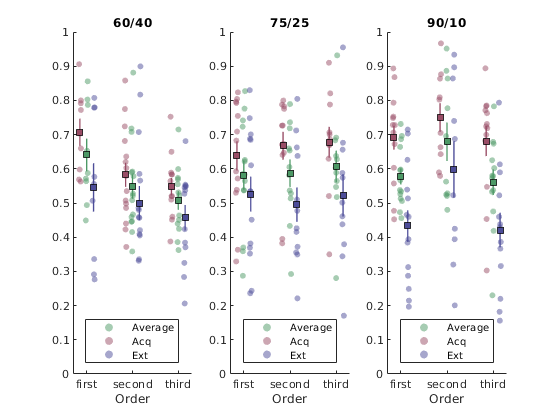

In [2]:
dloc = data(find(data.phase~=0 & data.Trial_Type==3),:);
[GS, Gkey, S, Skey, mle] = pX_get_stats(dloc, dloc.prob, {'order_str', 'contingency'});
[GS, Gkey, S_p, Skey_p, mle] = pX_get_stats(dloc, dloc.prob, {'order_str', 'contingency', 'phase_str', 'id'});
%[GS_m, Gkey_m, S_m, Skey_m, mle] = pX_get_stats(dloc, fitted(m1), {'order_str', 'contingency'});
ostr = unique(Gkey.order_str);
cstr = unique(Gkey.contingency);
f=figure;
cf=struct;
cf.opacity =0.5;
cf.legendmark = 'on';
for b = 1:numel(cstr)
    subplot(1,3,b)
    for or = 1:numel(ostr)
        if or == 1; cf.legendmark='on'; else cf.legendmark='off';end
        id = find( ismember(Skey.order_str,ostr{or}) & ismember(Skey.contingency, cstr{b})  );
        plot_vertical_jittered_column(or, S(id), [0.3 0.6 0.4], cf)
        id_a = find(ismember(Skey_p.phase_str, 'acq') & ismember(Skey_p.order_str,ostr{or}) & ismember(Skey_p.contingency, cstr{b})  );
        plot_vertical_jittered_column(or-0.15, S_p(id_a), [0.6 0.3 0.4], cf)
        id_b = find(ismember(Skey_p.phase_str, 'ext') & ismember(Skey_p.order_str,ostr{or}) & ismember(Skey_p.contingency, cstr{b})  );
        plot_vertical_jittered_column(or+0.15, S_p(id_b), [0.3 0.3 0.6], cf)
        legend('Average', 'Acq', 'Ext', 'location', 'south'); 
    end
    t=gca; t.XTick=1:3; t.XTickLabel=ostr;
    xlabel('Order');
    ylim([0 1]); xlim([0.7 3.3]);
    title(cstr{b});
end
f.Position(3) = 600;
f.Position(4) = 200;

In [3]:
 cf= []; 
cf.bycat=1;
cf.cat ={'contingency'};
Skey_p.prob = S_p;
[m] = pX_report_stats(Skey_p, 'prob', {'order_str', 'contingency', 'phase_str'}, {'id'}, cf);   

=====MAIN MODEL=====

mm = 


Linear mixed-effects model fit by ML

Model information:
    Number of observations             222
    Fixed effects coefficients          18
    Random effects coefficients         37
    Covariance parameters                2

Formula:
    Linear Mixed Formula with 4 predictors.

Model fit statistics:
    AIC        BIC        LogLikelihood    Deviance
    -184.32    -116.27    112.16           -224.32 

Fixed effects coefficients (95% CIs):
    Name                                                      Estimate 
    '(Intercept)'                                               0.55616
    'order_str_second'                                         0.043992
    'order_str_first'                                           0.10849
    'contingency_75/25'                                        0.091128
    'contingency_90/10'                                         0.14183
    'phase_str_ext'                                           -0.090868
    'order_str_se